# Poisson Distribution

The Poisson Distribution is a discrete probability distribution, it gives the probability of an event happening a certain number of times (k) within a given time interval. The Poisson has only one parameter lambda (λ) which is a rate. It is the mean number of events that occur in a given time period. An interesting feature of the Poisson distribution is that the mean and variance of the distribution are the same, they are both the value of lambda. 

In this notebook I will simulate data that follows a Poisson distribution and investigate that distribution using the Probability Mass Function (pmf) and Cumulative Density Function (cdf) to obtain the probabilities of different outcomes. 

In [1]:
# Importing key software libraries. 

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

The Poisson distribution is useful when we are trying to work out the rate at which events occur. So, this could be the frequency with which a certain event occurs in a year. For example, the number of vehicle accidents in a year. Although the Poisson is a discrete probability distribution, as its main parameter is the average number of events in a given interval, that mean can take on real number values and will not just be an integer value. This is still useful although we cannot have fractional occurrences of the events that are being recorded. For example, we can't have half a car accident or a quarter of a car accident. As is generally the case when you average over discrete integer count values you often get a continuous real number average. 

I the following section I am going to use the scipy poisson method to generate data with a Poisson distribution and then use the scipy pmf and cdf methods to interrogate that distribution. 

In [2]:
# Simulating some data using the scipy poisson method. The arguments for this method are lambda and the size
# of the sample we are seeking to generate. Here I have specified a mean (lambda) of 1.2 and a data sample size
# of 100,000 observations. There are many different exmaples we could consider to illustrate data that follows
# a Poisson process in the real world. Sticking with the vehicle accident example, this could be the average number of
# accidents each driver has per year. 
# Note: Here I am using the scipy random variates (rvs) method to simulate this data.
# I have specified an additional parameter of random_state as equal to 2. This will allow the results to be replicable
# by setting a seed for the pseudo-random number generation process.  

pois_rvs = stats.poisson.rvs(1.2, size = 100000, random_state = 2)

# Obtaining a printout of the first twenty values in the array. 
pois_rvs[:20]

array([1, 1, 1, 0, 1, 0, 2, 1, 3, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2])

Note that the above values are all integers, although the mean (lambda) parameter we specified was a decimal floating point number (1.2). This is obviously a statistical property as you can't have partial accidents. 

If we obtain the mean for our data we can see that it is very close to the value of 1.2 that we specified when generating the data. 

In [3]:
# Mean (lambda) value for our data array. 
pois_rvs.mean()

1.19286

In [4]:
# So that we can plot this more easily and visualise the distribution, I am going to convert it to a pandas series
# by wrapping it in the pandas series method.

pois_rvs = pd.Series(stats.poisson.rvs(1.2, size = 100000, random_state = 2))

In [5]:
# I am also going to create an additional variable object giving the counts of different values in the data. 

pois_count = pois_rvs.value_counts()

pois_count

1    36084
0    30473
2    21486
3     8565
4     2596
5      647
6      128
7       20
8        1
dtype: int64

We can see from the above value counts in the data that the most frequent occurrence was 1 accident, that happened 36084 times in the year, the second highest was 0 accidents that occurred 30473 times. Note that the value counts output is printed in descending order. This are the values we will use to create a histogram plot showing the proportion/ probability of each event. To do this we want to order the values based on the index rather than actual counts. So the x-axis will have our possible outcomes in ascending order.  

In [6]:
# To reorder the above count data we are going to sort the data based on index and then set the pois_count object
# to a dictionary showing key: value pairings. 
# Note: We could have done all this in one line above but I am walking through each step to make the manipulation of the
# data explicit. 

pois_count = pois_rvs.value_counts().sort_index().to_dict()

pois_count

{0: 30473, 1: 36084, 2: 21486, 3: 8565, 4: 2596, 5: 647, 6: 128, 7: 20, 8: 1}

Above, we can now see that each of our outcome values (Accidents: 0, 1, 2, etc.) and the frequency with which it occurred in our data are saved as a python dictionary as shown by the curly braces. 

Next we will plot the data so we can see the shape of the distribution. on this occasion I will use matplotlib to create a barplot that is analogous to a histogram if we were to normalise our data. 

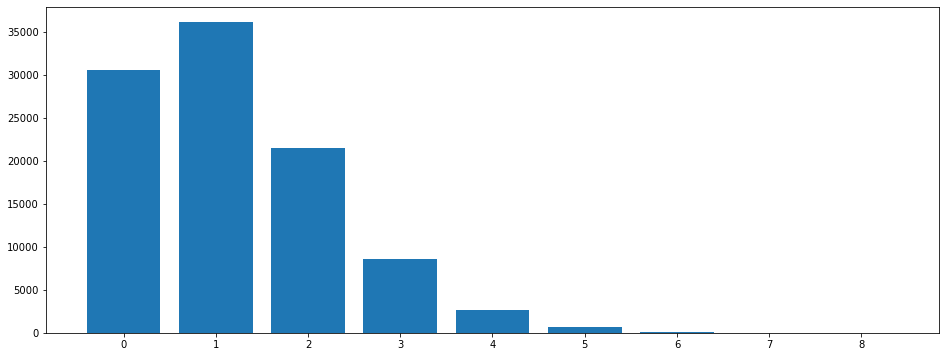

In [7]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.bar(range(len(pois_count)), list(pois_count.values()), align = 'center')
plt.xticks(range(len(pois_count)), list(pois_count.keys()))
plt.show()

We can see that the distribution of our data is postively skewed with larger frequencies (and probabilities) of events at lower values and very few observations of events occurring at higher values. Sticking with our accident example, most of our participants had 0, 1, or 2 accidents in a year (given time period) and fewer had multiple car accidents. The shape of this distribution is very typical of data that has the characteristics of a Poisson process. 

We can investigate its properties further using the pmf. 

In [8]:
# Defining a function that calculates the Probability Mass Function (pmf) for the poisson. 
# The function will take two arguments (number of events, lambda) and return a probability of seeing that number
# of events given the rate (lambda). 
# The equation in the function is that for the pmf of the Poisson distribution that can be found in most probability
# and statistics textbooks. 

def poiss_pmf(k, lam):
    return (lam ** k * np.exp(-lam)) / np.math.factorial(k)

In [9]:
# We can now call the above function for the pmf and pass arguments to find the probability of a particular value.
# For example, if we wanted to know the probability of observing 0 accidents, with a lambda rate of 1.2

poiss_pmf(0, 1.2)

0.30119421191220214

Above we can see that the pmf function returns as probability of 0.30, or about a 30% chance of a participant having no accidents. 

We defined a function to calculate the pmf for us above, this was largely to illustrate the equation that specifies the Poisson pmf. However, scipy already has a pmf method that we can use directly and this makes it easy to obtain probabilities such as the one above without coding our own functions. 

In [10]:
# Using the scipy pmf method. We are passing the same arguments as in our self-defined function.
# Note: We get the same result. 

stats.poisson.pmf(0, 1.2)

0.30119421191220214

As we created a dataset with a nicely rounded sample size of 100,000, the probability of observing 0 accidents (0.30) corresponds closely to the frequency count of 0's in our dataset (30,473), which represent 30% of our dataset. With a sample size that is very easy to divide by 10's, like this, we could have approximated this manually by putting our data on a scale from 0 to 1. This is known as normalisation and to do that with this size sample all we would have needed to do is divide through by the size of the sample (100,000). 

In [11]:
# Dividing the number of 0 counts through by the sample size.
# We can see the output is roughly 0.3 or 30%. It is not exactly the same as the pmf but that is to be expected as there
# is always error in our data. Remember that the mean for the data was close to 1.2 but not exactly 1.2. 
30473 / 100000

0.30473

We can also calculate the Cumulative Density Function (cdf) for the Poisson using the scipy cdf method. Recall from previous notebooks that the cdf is a continuous distribution function and therefore gives us probabilities between intervals. In the case of the cdf, this gives us the probability of observing a certain value or lower in our dataset. 

In [12]:
# The scipy cdf method takes the same arguments as the pmf. Here we can call it and see the probability of observing 2
# or fewer accidents, given a rate/ year of 1.2 accidents. 
# We can see that there is about an 88% (p = 0.879) probability that someone will be in 2 or fewer accidents. 

stats.poisson.cdf(2, 1.2)

0.8794870987836302

#### Summary:

- The Poisson Distribution is a discrete probability distribution. It expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate (lambda).
- We can generate/ simulate data that follows a Poisson distribution using the scipy.poisson.rvs method. 
- We can then investigate the properties of our data visually and obtain probabilities of observing specific values using the pmf. 
- We can also use the cdf to obtain probabilities for intervals in our data, such as the probability of observing k events or fewer. 